In [16]:
!pip install pingouin

!pip install japanize_matplotlib
# Janome（日本語形態素解析ライブラリ）のインストール
!pip install janome

# WordCloud（ワードクラウド作成ライブラリ）のインストール
!pip install wordcloud

# Janome（日本語形態素解析）
!pip install janome

# 言語判定ライブラリ
!pip install langdetect

# 翻訳ライブラリ（Google Translate APIの非公式ライブラリ）
# バージョン指定が重要です
!pip install googletrans==4.0.0-rc1

# ネットワーク分析ライブラリ
!pip install networkx

!pip install adjustText

# トピックモデル等で使う機械学習ライブラリ
!pip install scikit-learn

In [17]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LassoCV, RidgeCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib
import pingouin as pg
from itertools import combinations
import statsmodels.stats.multitest as multi
from scipy import stats
from scipy.stats import friedmanchisquare
from scipy.stats import chi2_contingency
from janome.tokenizer import Tokenizer
from wordcloud import WordCloud
import matplotlib.patches as mpatches
from janome.tokenizer import Tokenizer
from langdetect import detect
from googletrans import Translator
from collections import Counter
import networkx as nx
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [18]:
df = pd.read_csv(r"C:\Users\sk062\Downloads\df_cleaned - df_cleaned.csv.csv")
df = df.rename(columns={'利用経験_児童配送ロボット_数値': '利用経験_自動配送ロボット_数値'})

In [26]:
# df.info()

In [28]:
# クラスター分析
features = ['歩道_優先度_高齢者', '歩道_優先度_自動配送ロボット', '歩道_優先度_普通の人', '歩道_優先度_自転車', '歩道_優先度_こども', '歩道_優先度_車椅子', '歩道_優先度_電動キックボード']
X = df[features]

# データを標準化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# エルボー法で最適なクラスター数を探す
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    km.fit(X_scaled)
    distortions.append(km.inertia_)

# plt.plot(range(1, 11), distortions, marker='o')
# plt.xlabel('Number of clusters')
# plt.ylabel('Distortion')
# plt.title('Elbow Method')
# plt.show()

C:\Users\sk062\miniconda3\envs\Study\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sk062\miniconda3\envs\Study\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sk062\miniconda3\envs\Study\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sk062\miniconda3\envs\Study\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

In [30]:
# 3. k-means法によるクラスタリングの実行
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10, max_iter=300, random_state=0)
clusters = kmeans.fit_predict(X_scaled)

# 4. 元のデータフレームにクラスター番号を追加
df['cluster'] = clusters

# 5. 各クラスターの特徴を平均値で確認
cluster_features = df.groupby('cluster')[features].mean()

# print("--- 各クラスターの優先度評価（平均値） ---")
# print(cluster_features)
# 6. 主成分分析(PCA)で2次元に削減
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df['pca1'] = X_pca[:, 0]
df['pca2'] = X_pca[:, 1]

# 7. 結果のプロット
# plt.figure(figsize=(12, 8))
# sns.scatterplot(x='pca1', y='pca2', hue='cluster', data=df, palette='viridis', s=100, alpha=0.8)
# plt.title('K-meansクラスタリング結果（PCAの可視化）')
# plt.xlabel('主成分 1')
# plt.ylabel('主成分 2')
# plt.legend(title='Cluster')
# plt.grid(True)



# y軸の範囲を-6から6までに設定

# plt.ylim(-7, 7)
# plt.savefig(r"C:\Users\sk062\Downloads\scatter_111.png", dpi=300)
# plt.show()

C:\Users\sk062\miniconda3\envs\Study\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [31]:
# 各クラスターのサイズ（人数）を確認
print("--- 各クラスターの人数 ---")
# print(df['cluster'].value_counts().sort_index())
print("\n" + "="*50 + "\n")

# 年代の分布を確認 (度数)
print("--- 各クラスターの年代分布（人数） ---")
age_distribution = pd.crosstab(df['cluster'], df['年代_数値'])
# print(age_distribution)
# ①各クラスターの年代分布(人数)を.csvに保存するコード
# age_distribution.to_csv(r"C:\Users\sk062\Downloads\cluster_age_distribution.csv")
print("\n" + "="*50 + "\n")

# 年代の分布を確認 (割合)
print("--- 各クラスターの年代分布（割合） ---")
# print(pd.crosstab(df['cluster'], df['年代_数値'], normalize='index'))
print("\n" + "="*50 + "\n")

# 性別の分布を確認
gender_cols = ['性別_男性', '性別_女性', '性別_回答しない']
print("--- 各クラスターの性別分布（人数） ---")
gender_distribution = df.groupby('cluster')[gender_cols].sum()
# print(gender_distribution)
# ②各クラスターの性別分布(人数)を.csvに保存するコード
# gender_distribution.to_csv(r"C:\Users\sk062\Downloads\cluster_gender_distribution.csv")
print("\n" + "="*50 + "\n")

# 新モビリティ利用経験の平均値を確認
exp_cols = ['利用経験_電動キックボード_数値', '利用経験_自動配送ロボット_数値', '利用経験_自動運転バス_数値']
print("--- 各クラスターの利用経験（平均値） ---")
# experience_mean = df.groupby('cluster')[exp_cols].mean()
# print(experience_mean)
# ③各クラスターの利用経験（平均値）を.csvに保存するコード
# experience_mean.to_csv(r"C:\Users\sk062\Downloads\cluster_experience_mean.csv")

--- 各クラスターの人数 ---


--- 各クラスターの年代分布（人数） ---


--- 各クラスターの年代分布（割合） ---


--- 各クラスターの性別分布（人数） ---


--- 各クラスターの利用経験（平均値） ---


--- 主成分分析の結果 (固有値・寄与率・累積寄与率) ---
     主成分           固有値           寄与率     累積寄与率
0  第1主成分  2.152711e+00  3.046289e-01  0.304629
1  第2主成分  1.398181e+00  1.978558e-01  0.502485
2  第3主成分  1.222765e+00  1.730327e-01  0.675517
3  第4主成分  1.006624e+00  1.424467e-01  0.817964
4  第5主成分  7.927837e-01  1.121864e-01  0.930150
5  第6主成分  4.936032e-01  6.984952e-02  1.000000
6  第7主成分  3.469447e-17  4.909595e-18  1.000000


--- 主成分負荷量 ---
                    第1主成分     第2主成分     第3主成分     第4主成分     第5主成分     第6主成分  \
歩道_優先度_高齢者      -0.199106 -0.582438 -0.295671  0.733281  0.072511  0.016306   
歩道_優先度_自動配送ロボット -0.600194  0.493353 -0.423210 -0.201486  0.394537 -0.174731   
歩道_優先度_普通の人      0.800666  0.245046 -0.217255 -0.032733  0.149762  0.487555   
歩道_優先度_自転車       0.241098  0.633196  0.528810  0.423907 -0.247536 -0.172763   
歩道_優先度_こども       0.686394 -0.367075 -0.277195 -0.357045 -0.298691 -0.331827   
歩道_優先度_車椅子      -0.752718 -0.182942  0.220189 -0.289780 -0.439746  0.289205   
歩道_優先度_電動キックボード  0.12

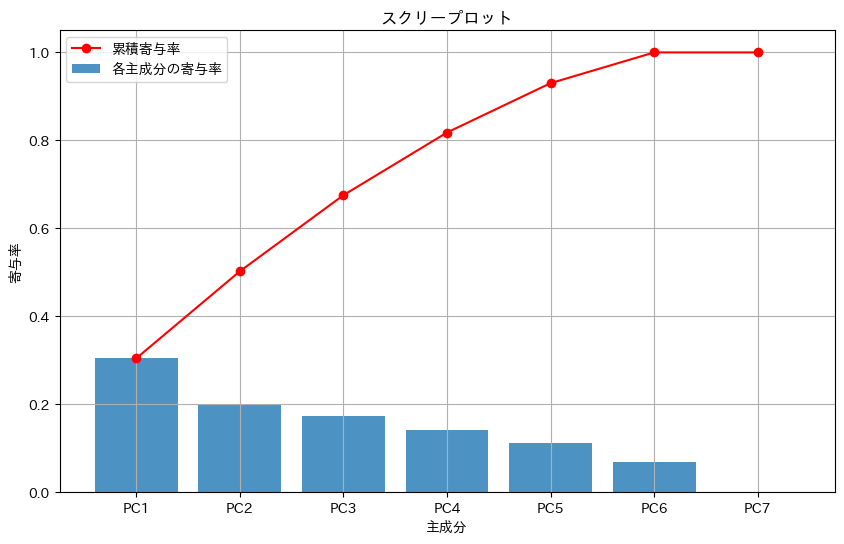

In [25]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# ダミーデータフレームの作成 (元の 'df' がないため、再現用に作成します)
# 実際にご利用の際は、この部分は不要で、お手元のdfをそのままお使いください。
features = ['歩道_優先度_高齢者', '歩道_優先度_自動配送ロボット', '歩道_優先度_普通の人', '歩道_優先度_自転車', '歩道_優先度_こども', '歩道_優先度_車椅子', '歩道_優先度_電動キックボード']

# --- ここからが主成分分析のコードです ---

# 1. 特徴量の選択と標準化
X = df[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. 主成分分析の実行（n_componentsを指定しないですべての主成分を計算）
pca = PCA()
pca.fit(X_scaled)

# 3. 固有値、寄与率、累積寄与率の計算と表示
# 固有値 (Explained Variance)
eigenvalues = pca.explained_variance_
# 寄与率 (Explained Variance Ratio)
contribution_ratios = pca.explained_variance_ratio_
# 累積寄与率 (Cumulative Explained Variance Ratio)
cumulative_contribution_ratios = np.cumsum(contribution_ratios)

# 結果をデータフレームにまとめる
pca_results = pd.DataFrame({
    '主成分': [f'第{i+1}主成分' for i in range(len(features))],
    '固有値': eigenvalues,
    '寄与率': contribution_ratios,
    '累積寄与率': cumulative_contribution_ratios
})

print("--- 主成分分析の結果 (固有値・寄与率・累積寄与率) ---")
# print(pca_results)
print("\n" + "="*50 + "\n")

# pca_results.to_csv(r"C:\Users\sk062\Downloads\pca_results.csv")
# 4. 主成分負荷量の計算と表示
# 主成分負荷量 (Factor Loadings)
# 各主成分ベクトル（固有ベクトル）に、対応する固有値の平方根を掛けて算出
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# 結果をデータフレームにまとめる
loadings_df = pd.DataFrame(loadings, 
                           columns=[f'第{i+1}主成分' for i in range(len(features))],
                           index=features)

print("--- 主成分負荷量 ---")
# print(loadings_df)
print("\n" + "="*50 + "\n")

# 参考: 主成分負荷量をCSVファイルに出力する場合
# loadings_df.to_csv(r"C:\Users\sk062\Downloads\loadings_df.csv")

# 5. 寄与率の可視化（スクリープロット）
# plt.figure(figsize=(10, 6))
# plt.bar(range(1, len(features) + 1), contribution_ratios, alpha=0.8, align='center', label='各主成分の寄与率')
# plt.plot(range(1, len(features) + 1), cumulative_contribution_ratios, 'r-o', label='累積寄与率')
# plt.xticks(range(1, len(features) + 1), [f'PC{i}' for i in range(1, len(features) + 1)])
# plt.xlabel('主成分')
# plt.ylabel('寄与率')
# plt.title('スクリープロット')
plt.legend(loc='best')
plt.grid(True)
plt.savefig(r"C:\Users\sk062\Downloads\plpl.png",dpi=300)
plt.show()